# Data Mining II - Hierarchical Clustering

The point of this project is to add vital tools to the data analytics arsenal that incorporates unsupervised models. This project explains when, how, and why to use these tools to best meet organizational needs. As organizations generate exponentially more data each year, it is vitally important that they can use this data in ways that help drive toward their goals. Data mining is the process of discovering patterns and correlations within large sets of data. Organizations can then use these patterns or correlations to accurately predict outcomes, identify significant variables, or to perform lift analysis. Information technology professionals with skills in data mining are increasingly in demand to help organizations maximize the value of the organization’s data. In this course you will use Python or R to apply clustering techniques, implement dimensional reduction methods, and predict patterns in data using market basket analysis.


## Competencies 
__Clustering Techniques__ <br>
Applies clustering techniques to accurately predict outcomes of interest.

## Write Up 
__Research Question__ <br>
Are there any meaningful clusters within the survey data? 

__Goals__ <br>
One goal of the data analysis is to determine if there are any meaningful clusters within the survey data of the medical data set using the hierarchical technique. 

__Explanation of the Clustering Technique__ <br>
The clustering technique I chose is the hierarchical clustering technique. This method “is an unsupervised learning technique used to group similar objects into clusters. It creates a hierarchy of clusters by merging or splitting them based on similarity measures.” (Sharma, 2019) More specifically we will be using the agglomerative technique of hierarchical clustering that starts with each object as a separate cluster that eventually results in one final cluster. With this technique, we will end up with an optimal number of clusters and a measure of the quality of the clusters. 

The following will be used to perform agglomerative hierarchical clustering: 
- Distance Matrix measured using the Euclidean distance function
- The Ward Method: “The Ward approach analyzes the variance of the clusters rather than measuring distances directly, minimizing the variance between clusters.” (Karabiber, n.d.)
- A dendrogram is created to determine optimal number of clusters.
- Silhouette score is calculated to determine quality.


__Summary of Assumptions__ <br>
One assumption of hierarchical clustering is defining a measurement of dissimilarity or similarity. This measurement allows for the clusters to be determined based on the similarity between data points. Within this hierarchical clustering technique, the defining measurement is using the Euclidean distance function. 


## Code

In [1]:
# Importing packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 
import seaborn as sns
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import silhouette_score

In [2]:
# Importing medical data CSV and creating the medical_data DataFrame
medical_data = pd.read_csv("C:/Users/Makayla Avendano/Desktop/medical_clean.csv")

In [3]:
# Looking at columns, non-null counts and data types 
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Narrow down data
survey_data = ['Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']
medical_data = medical_data[survey_data]

In [5]:
# Updated data frame 
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Item1   10000 non-null  int64
 1   Item2   10000 non-null  int64
 2   Item3   10000 non-null  int64
 3   Item4   10000 non-null  int64
 4   Item5   10000 non-null  int64
 5   Item6   10000 non-null  int64
 6   Item7   10000 non-null  int64
 7   Item8   10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


In [6]:
# Rename column names according to survey data 
medical_data = medical_data.rename(columns={'Item1': 'Item1_Timely_Admission', 'Item2': 'Item2_Timely_Treatment', 'Item3': 'Item3_Timely_visits', 'Item4': 'Item4_Reliability', 'Item5': 'Item5_Options', 'Item6': 'Item6_Hrs_of_treatment','Item7': 'Item7_Courteous_staff','Item8': 'Item8_Active_Listening'})

In [7]:
# Updated data frame 
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Item1_Timely_Admission  10000 non-null  int64
 1   Item2_Timely_Treatment  10000 non-null  int64
 2   Item3_Timely_visits     10000 non-null  int64
 3   Item4_Reliability       10000 non-null  int64
 4   Item5_Options           10000 non-null  int64
 5   Item6_Hrs_of_treatment  10000 non-null  int64
 6   Item7_Courteous_staff   10000 non-null  int64
 7   Item8_Active_Listening  10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


## Data Cleaning 
Data cleaning is an integral part of any data analysis. To make my analysis as accurate as possible, it is necessary to verify that the data is clean. Cleaning the data involves looking at duplicates, missing values, and outliers. 

### Duplicates 
With duplicates in the data, we are exposed to potential integrity threats including causing inaccuracies and skewing the data with unnecessary inflation. The steps used to clean duplicates in the data include the use of .duplicated and .value_counts to look at the counts of duplicates within each variable. 

In [8]:
# Duplicates 
medical_duplicates = medical_data.duplicated()
print(medical_duplicates.value_counts())

False    7624
True     2376
Name: count, dtype: int64


In [9]:
# Looking at all unique values 
unique_values = np.unique(medical_data)
print(unique_values)

[1 2 3 4 5 6 7 8]


### Missing Values 
Missing values can also negatively influence the data similar to duplicates through possible integrity threats like inaccuracies and inflation or deflation of values. Missing values were addressed using the pair of the .isnull() and .sum() function. This looked at each variable and indicated whether any values were missing within that variable. I also verified this information with the use of the missingno library and the msno function to create a matrix to indicate no values were missing. 

In [ ]:
# Missing Values 
# Sum of all null values within each column 
medical_data.isnull().sum()

In [11]:
# Exploratory
# EDA - Looking at descriptive statistics
medical_data.describe()

,Item1_Timely_Admission,Item2_Timely_Treatment,Item3_Timely_visits,Item4_Reliability,Item5_Options,Item6_Hrs_of_treatment,Item7_Courteous_staff,Item8_Active_Listening
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [12]:
# Change data types to floats 
medical_data['Item1_Timely_Admission'] = medical_data['Item1_Timely_Admission'].astype(float)
medical_data['Item2_Timely_Treatment'] = medical_data['Item2_Timely_Treatment'].astype(float)
medical_data['Item3_Timely_visits'] = medical_data['Item3_Timely_visits'].astype(float)
medical_data['Item4_Reliability'] = medical_data['Item4_Reliability'].astype(float)
medical_data['Item5_Options'] = medical_data['Item5_Options'].astype(float)
medical_data['Item6_Hrs_of_treatment'] = medical_data['Item6_Hrs_of_treatment'].astype(float)
medical_data['Item7_Courteous_staff'] = medical_data['Item7_Courteous_staff'].astype(float)
medical_data['Item8_Active_Listening'] = medical_data['Item8_Active_Listening'].astype(float)

## Data Preprocessing 
One data preprocessing goal relevant to the hierarchical technique would be inversing the survey data. The survey data is initially ranked from 1 to 8 with 8 being the least important. This makes the interpretation confusing as the highest rank for the questions is 1 instead of 8. By inversing the data and making the most important 8 instead of 1, we can make the data easier to read and interpret. Another preprocessing goal that goes hand in hand would be renaming the columns to better understand what questions are for each item. 

In [13]:
# Inverse data points to represent survey information 
survey_replace = {1: 8, 2: 7, 3: 6, 4: 5, 5: 4, 6: 3, 7: 2, 8: 1}
medical_data['Item1_Timely_Admission'] = medical_data['Item1_Timely_Admission'].replace(survey_replace)
medical_data['Item2_Timely_Treatment'] = medical_data['Item2_Timely_Treatment'].replace(survey_replace)
medical_data['Item3_Timely_visits'] = medical_data['Item3_Timely_visits'].replace(survey_replace)
medical_data['Item4_Reliability'] = medical_data['Item4_Reliability'].replace(survey_replace)
medical_data['Item5_Options'] = medical_data['Item5_Options'].replace(survey_replace)
medical_data['Item6_Hrs_of_treatment'] = medical_data['Item6_Hrs_of_treatment'].replace(survey_replace)
medical_data['Item7_Courteous_staff'] = medical_data['Item7_Courteous_staff'].replace(survey_replace)
medical_data['Item8_Active_Listening'] = medical_data['Item8_Active_Listening'].replace(survey_replace)

In [14]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item1_Timely_Admission  10000 non-null  float64
 1   Item2_Timely_Treatment  10000 non-null  float64
 2   Item3_Timely_visits     10000 non-null  float64
 3   Item4_Reliability       10000 non-null  float64
 4   Item5_Options           10000 non-null  float64
 5   Item6_Hrs_of_treatment  10000 non-null  float64
 6   Item7_Courteous_staff   10000 non-null  float64
 7   Item8_Active_Listening  10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB


## Data Set Variables 
All data 8 survey data variables are categorical variables due to the numbers implicating a scale of importance rather than a numerical representation. All variables are survey questions asking about importance of a certain aspect of hospital experiences. Initially, the data was ranked from 1 to 8 with 1 being the most important and 8 being the least important. This was then changed to be able to interpret the data easier. 
 
Item 1 (Item1_Timely_Admission) - How important is timely admissions?  <br>
Item 2 (Item2_Timely_Treatment) - How important is timely treatment? <br>
Item 3 (Item3_Timely_visits) - How important is timely visits? <br>
Item 4 (Item4_Reliability) - How important is reliability? <br>
Item 5 (Item5_Options)  - How important is the options the hospital has? <br>
Item 6 (Item6_Hrs_of_treatment) - How important is hours of treatment? <br>
Item 7 (Item7_Courteous_staff) - How important is courteous staff? <br>
Item 8 (Item8_Active_Listening) - How important is active listening? <br>


In [1]:
# Export Clean CSV file 
medical_data.to_csv('cleaned_task1.csv')

NameError: name 'cleaned_df' is not defined

## Output and Intermediate Calculations 
The optimal number of clusters in the data set is 2. “We get the appropriate number of clusters by drawing a horizontal line through that highest vertical line, and the number of intersections corresponds to the number of clusters.” (Keita, n.d.) Looking at our dendrogram, the highest vertical line is cut and is left with 2 intersections leading to the optimal number of clusters. 

In [15]:
# Hierarchical clustering using the ward method 
# Perform linkage
distance_matrix = linkage(medical_data, method = 'ward', metric='euclidean')

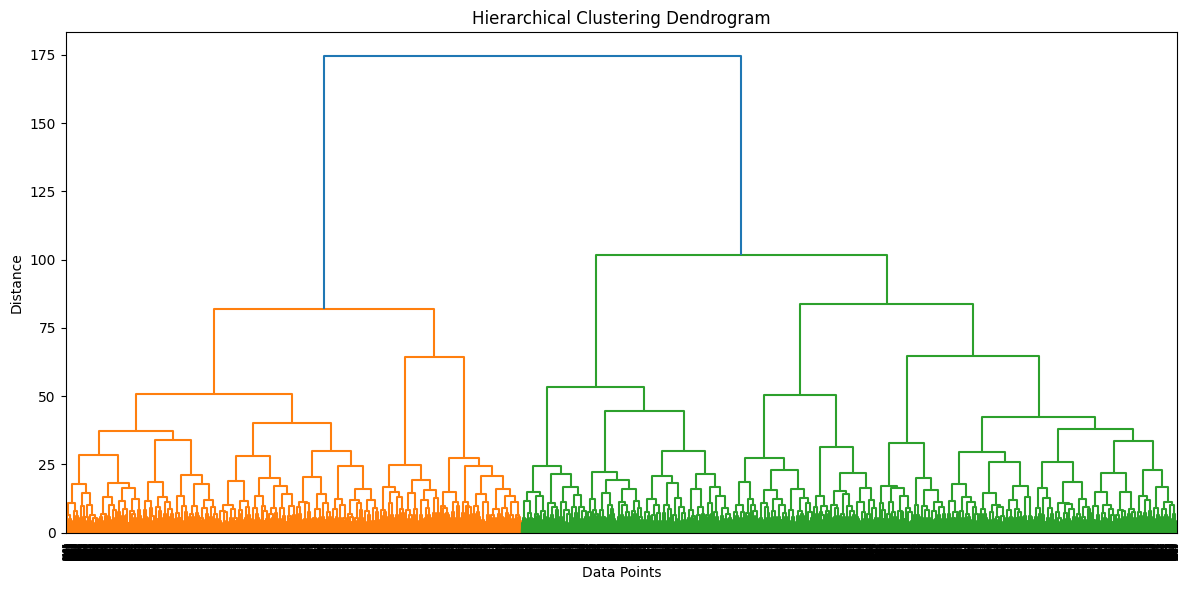

In [16]:
# Visualizing the dendrogram 
plt.figure(figsize=(12,6))
dendrogram(distance_matrix, 
           labels= medical_data.index,
           leaf_rotation=90)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.tight_layout()
plt.show()

In [17]:
# Extracting cluster labels 
labels = fcluster(distance_matrix,2,criterion='maxclust')
pairs = pd.DataFrame({'label': labels, 'survey': medical_data.index})
value_counts = pairs['label'].value_counts().sort_index()
print(value_counts)

label
1    4105
2    5895
Name: count, dtype: int64


In [18]:
# Calculate the silhouette score 
silhouette_avg = silhouette_score(medical_data, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.1483694611652974


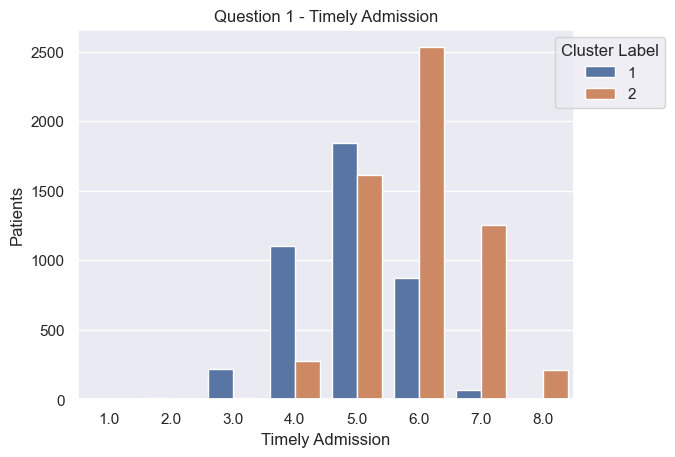

In [19]:
# Looking at comparisons for each question and the clusters 
sns.set(style="darkgrid")

sns.countplot(data=medical_data, x='Item1_Timely_Admission', hue=pairs['label'])
plt.xlabel('Timely Admission')
plt.ylabel('Patients')
plt.title('Question 1 - Timely Admission')
plt.legend(title='Cluster Label', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

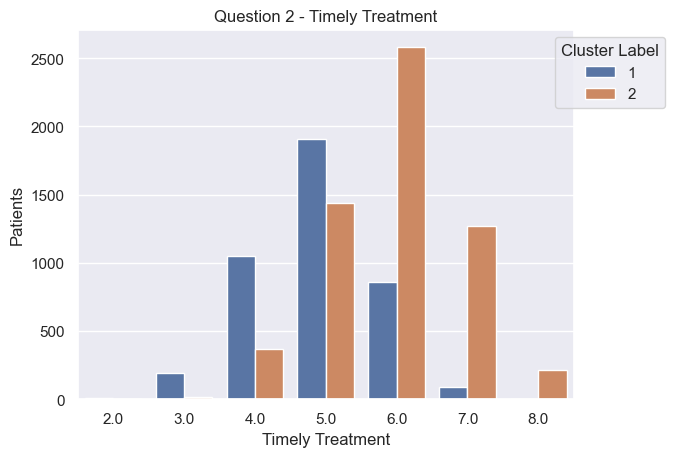

In [20]:
sns.countplot(data=medical_data, x='Item2_Timely_Treatment', hue=pairs['label'])
plt.xlabel('Timely Treatment')
plt.ylabel('Patients')
plt.title('Question 2 - Timely Treatment')
plt.legend(title='Cluster Label', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

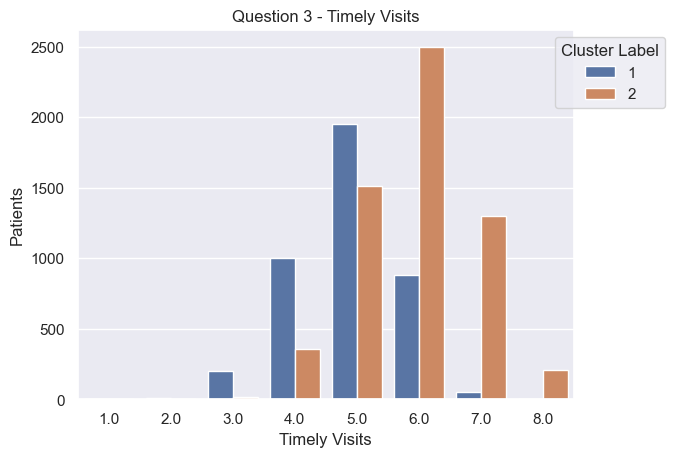

In [21]:
sns.countplot(data=medical_data, x='Item3_Timely_visits', hue=pairs['label'])
plt.xlabel('Timely Visits')
plt.ylabel('Patients')
plt.title('Question 3 - Timely Visits')
plt.legend(title='Cluster Label', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

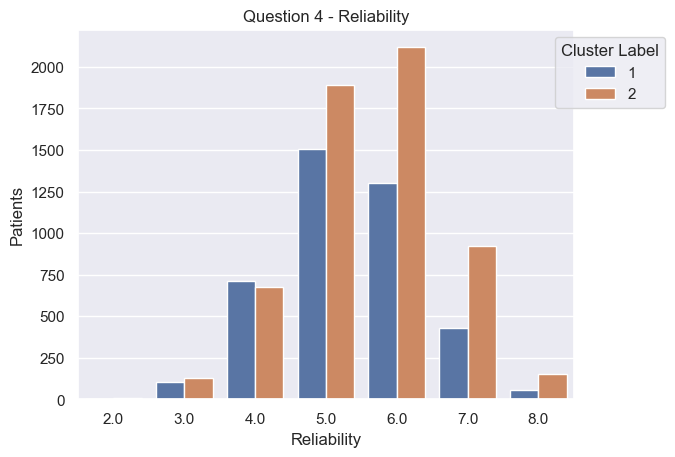

In [22]:
sns.countplot(data=medical_data, x='Item4_Reliability', hue=pairs['label'])
plt.xlabel('Reliability')
plt.ylabel('Patients')
plt.title('Question 4 - Reliability')
plt.legend(title='Cluster Label', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

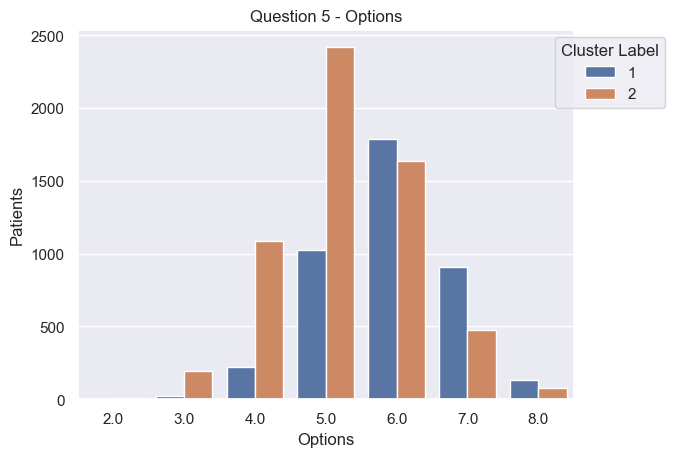

In [23]:
sns.countplot(data=medical_data, x='Item5_Options', hue=pairs['label'])
plt.xlabel('Options')
plt.ylabel('Patients')
plt.title('Question 5 - Options')
plt.legend(title='Cluster Label', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

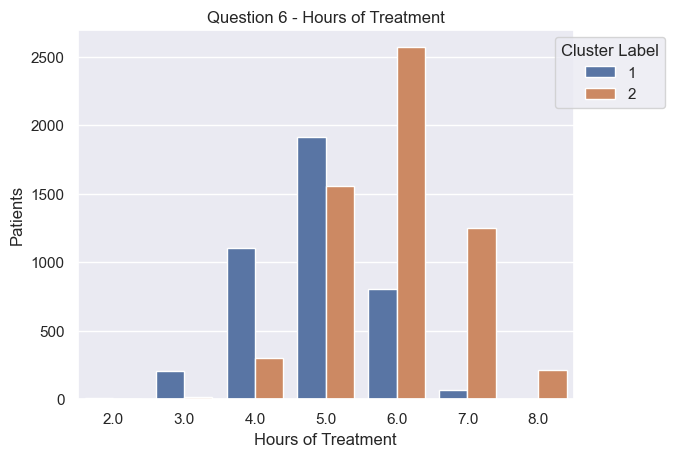

In [24]:
sns.countplot(data=medical_data, x='Item6_Hrs_of_treatment', hue=pairs['label'])
plt.xlabel('Hours of Treatment')
plt.ylabel('Patients')
plt.title('Question 6 - Hours of Treatment')
plt.legend(title='Cluster Label', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

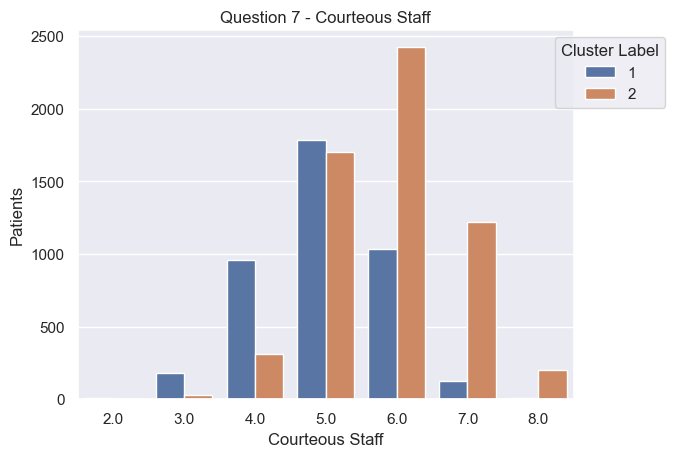

In [26]:
sns.countplot(data=medical_data, x='Item7_Courteous_staff', hue=pairs['label'])
plt.xlabel('Courteous Staff')
plt.ylabel('Patients')
plt.title('Question 7 - Courteous Staff')
plt.legend(title='Cluster Label', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

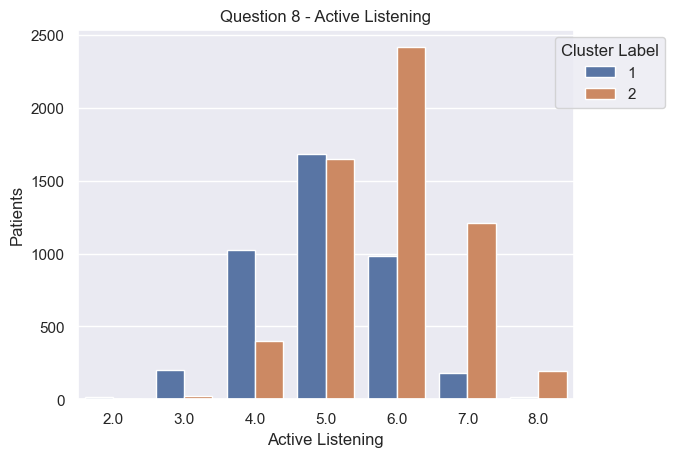

In [27]:
sns.countplot(data=medical_data, x='Item8_Active_Listening', hue=pairs['label'])
plt.xlabel('Active Listening')
plt.ylabel('Patients')
plt.title('Question 8 - Active Listening')
plt.legend(title='Cluster Label', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

In [28]:
# Raw means of each question for each cluster 
cluster_means = medical_data.groupby(pairs['label']).mean()
print(cluster_means)

       Item1_Timely_Admission  Item2_Timely_Treatment  Item3_Timely_visits  \
label                                                                        
1                    4.865043                4.895493             4.890378   
2                    5.910263                5.909584             5.905683   

       Item4_Reliability  Item5_Options  Item6_Hrs_of_treatment  \
label                                                             
1               5.336906       5.904507                4.853837   
2               5.587956       5.223579                5.911790   

       Item7_Courteous_staff  Item8_Active_Listening  
label                                                 
1                   4.991474                 4.98514  
2                   5.864292                 5.84207  


In [29]:
# Rounded means of each cluster
cluster_means = medical_data.groupby(pairs['label']).mean()
cluster_means = cluster_means.round(0)
print(cluster_means)

       Item1_Timely_Admission  Item2_Timely_Treatment  Item3_Timely_visits  \
label                                                                        
1                         5.0                     5.0                  5.0   
2                         6.0                     6.0                  6.0   

       Item4_Reliability  Item5_Options  Item6_Hrs_of_treatment  \
label                                                             
1                    5.0            6.0                     5.0   
2                    6.0            5.0                     6.0   

       Item7_Courteous_staff  Item8_Active_Listening  
label                                                 
1                        5.0                     5.0  
2                        6.0                     6.0  


## Quality of the Clustering Technique
To determine the quality of the clusters, we use a metric called the silhouette score. “The silhouette score is a number between -1 and 1 that measures the quality of clusters based on how similar the observations within a cluster are compared to other clusters.” (Sabelhaus, 2022) The calculated silhouette score for our assigned clusters was 0.1438. With a higher value representing better clustering, we can make the conclusion that the quality of our clusters is very low and may not be very significant. This is also indicative of potential overlapping of clusters or data points that are close to the decision boundaries. 

## Results and Implications 
Other than the silhouette score indicated in E1, there are multiple other observations and implications that can be made from this hierarchical clustering analysis. The hospital has given their customers a survey asking questions regarding certain factors in reference to a hospital stay. They were asked to rank the importance of each factor with 8 being the most important and 1 being the least important (this is after the data was inversed to make the data easier to interpret).  Below is a table of the mean values for each cluster. The higher average for each question is highlighted in green. 

Looking at the mean comparisons above, cluster 2 had a higher ranked average in 7 out of 8 questions. Timely admission, timely treatment, timely doctor visits, and hours of treatment all had similar mean comparisons with cluster 1 ranging from 4.85 to 4.90 and cluster 2 all having a mean value of 5.91. Reliability was the closest mean comparison with cluster 1 having a mean of 5.34 and cluster 2 with a mean of 5.59. Options was the only question that resulted in cluster 1 (5.90) being higher than cluster 2 (5.22). Lastly, courteous staff and active listening had similar mean comparisons with cluster 1 having a mean of 4.99 and cluster 2 ranging from 5.84 to 5.86. Below I will go into a more detailed comparison of each question: 

# Survey Questions 

## Questions 1, 2, 3, 6
For all the questions shown below we have the same observations – neither cluster 1 or 2 selected 1 or 2 which are the least important selections. Cluster 1 had a higher volume of customers selecting 3, 4, and 5 with very little 7 selections and no customers selecting 8 the most important. Cluster 2 had higher volume in options 6, 7, and 8 with small amounts of patients selecting option 4 and no customers selecting option 3. This information implies that cluster 2 has a higher appreciation for timely admission, timely treatment, timely doctor visits, and hours of treatment. 

## Questions 4 
Cluster 2 had higher selections for all selections except for 4. Cluster 1 had customer selections in all values with a higher concentration in option 5. Cluster 2 also had customer selections in all values with a higher concentration in option 6. The mean for question 4 was also close with cluster 1 at 4.34 and cluster 2 at 5.59. Cluster 2 has higher values which can lead to the implication that cluster 2 also has a higher appreciation for reliability than cluster 1, but due to the close nature of the data it’s hard to assume this in confidence. 

## Questions 5 
Question 5 is similar to Questions 1, 2, 3, and 6, but reversed. Cluster 2 had a higher volume of customers selecting 3, 4, and 5 with little 7 and 8 selections. Cluster 1 had higher volume in options 6, 7, and 8 with small amounts of patients selecting option 4 and no customers selecting option 3. This information implies that cluster 1 has a higher appreciation for hospital options. 

## Questions 7 and 8
Questions 7 and 8 are also similar to questions 1, 2, 3, and 6 with a few slight differences. Cluster 1 had a higher volume of customers selecting 3, 4, and 5 with very little 7 selections and no customers selecting 8 the most important. Cluster 2 had higher volume in options 6, 7, and 8 with small amounts of patients selecting option 4 and a few customers selecting option 3. This information implies that cluster 2 has a higher appreciation for both courteous staff and active listening.

In conclusion, our results indicate that cluster 2 overall values these factors slightly more than cluster 1 apart from hospital options which holds more value to cluster 1 individuals. It is important to note that although we do see differences in clusters, it is such a miniscule difference that it could potentially not be meaningful at all. 


# Limitations 
One of the main limitations with hierarchical clustering is the runtime. As data points increase, runtime also increases causing hierarchical clustering to be difficult to move forward with when a large data set is being used. “When training a hierarchical clustering algorithm for large datasets, the training process takes so much time with space which results in poor performance of the algorithms.” (Shakula, 2022) This will also be evident in the Panopto video when I show how long it takes to populate the dendrogram. 

# Course of Action 
One course of action recommendation based on the results and implications discussed in E2 would be to change the structure of the survey entirely. Based on the silhouette score and the overall comparison of cluster 1 and cluster 2, the analysis was not effective due to the close nature of the data. This is evident in the graphs as well with all values leaning more toward the middle values. Instead of a 1 to 8 scale, I would recommend a switch to a more qualitative Likert scale ranging from Strongly Agree to Strongly Disagree. This will not only limit the pool of options to 5 instead of 8 it will also give the hospital a chance to be more precise in the questions asked on the survey. 